# Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Practice_Module19_Neural/Practice_Challenge/Data_Files/Challenge_Data_Files/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'],1)
application_df.shape

(34299, 10)

In [3]:
# STATUS has 0 for 5 rows which doesnt make sense as it means Charity is not active
# Hence keeping data having STATUS = 1 and remove the 5 rows with STATUS = 0
application_df = application_df.loc[application_df['STATUS'] == 1]
application_df.shape

(34294, 10)

In [4]:
# Reset the Index of the df as 5 rows somewhere in between were removed
# This makes sure that the index numbering is continuous without any breaks in between
# If this step is not done the merge of encode_df & this df will lead to mismatch of data
application_df = application_df.reset_index(drop=True)
application_df.tail()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34289,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34290,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34291,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34292,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34293,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


In [5]:
# As all rows have STATUS = 1 it doesnt impact the target hence remove the column 
application_df = application_df.drop(['STATUS'],1)
application_df.shape

(34294, 9)

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()
# APPLICATION_TYPE = 17 is a categorical column
# CLASSIFICATION = 71 is a categorical column
# ASK_AMT = 8747 is a numerical column so no need to do any further processing

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

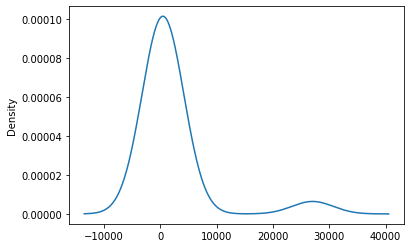

In [8]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
# Replace the value as Other if count is less than 100
replace_app = list(app_counts[app_counts < 100].index)

# Replace in dataframe
for app in replace_app:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27032
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classfn_counts = application_df["CLASSIFICATION"].value_counts()
classfn_counts

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
         ...  
C1370        1
C6100        1
C1900        1
C1728        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

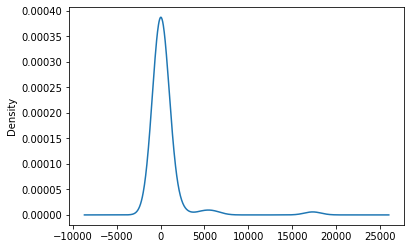

In [11]:
# Visualize the value counts of CLASSIFICATION
classfn_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
# Replace the value as Other if count is less than 250
replace_class = list(classfn_counts[classfn_counts < 250].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [13]:
# Look at AFFILIATION value counts for binning
affil_counts = application_df["AFFILIATION"].value_counts()
affil_counts

Independent         18477
CompanySponsored    15703
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

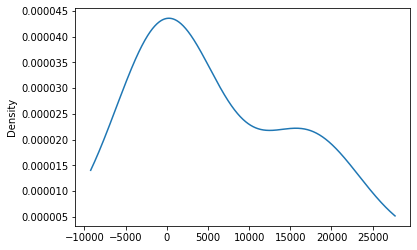

In [14]:
# Visualize the value counts of AFFILIATION
affil_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ..?
# Replace the value as FamNatRegOther if count is less than 100
replace_affil = list(affil_counts[affil_counts < 100].index)

# Replace in dataframe
for affil in replace_affil:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(affil,"FamNatRegOther")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18477
CompanySponsored    15703
FamNatRegOther        114
Name: AFFILIATION, dtype: int64

In [16]:
# Generate our categorical variable lists
application_cat = application_df.columns[application_df.dtypes == "object"]
# Make sure all categorical columns has unique values not greater than 10
application_df[application_cat].nunique()

APPLICATION_TYPE          10
AFFILIATION                3
CLASSIFICATION             8
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [17]:
# Display the df and make sure the indexing is all continuous and correct before Encoding
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34289,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34290,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34291,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34292,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

In [19]:
# Display the encode df and make sure the indexing is all correct before merging
encode_df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34290,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [21]:
# display the merged df to make sure everything is correct after merge
application_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34290,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34291,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34292,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Deliverable 2: Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# Following guideline of 2 to 3 times the number_input_features which is 42 in this case
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4300      
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 17,991
Trainable params: 17,991
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("ASOptimized_checkpoints/",exist_ok=True)
checkpoint_path = "ASOptimized_checkpoints/weights.{epoch:02d}.hdf5"

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 770us/step - loss: 0.5781 - accuracy: 0.7104
Epoch 2/50
804/804 [==============================] - 1s 787us/step - loss: 0.5553 - accuracy: 0.7281
Epoch 3/50
804/804 [==============================] - 1s 762us/step - loss: 0.5544 - accuracy: 0.7282
Epoch 4/50
804/804 [==============================] - 1s 783us/step - loss: 0.5551 - accuracy: 0.7271
Epoch 5/50
721/804 [=========================>....] - ETA: 0s - loss: 0.5503 - accuracy: 0.7290
Epoch 00005: saving model to ASOptimized_checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 782us/step - loss: 0.5504 - accuracy: 0.7289
Epoch 6/50
804/804 [==============================] - 1s 773us/step - loss: 0.5495 - accuracy: 0.7279
Epoch 7/50
804/804 [==============================] - 1s 749us/step - loss: 0.5512 - accuracy: 0.7264
Epoch 8/50
804/804 [==============================] - 1s 792us/step - loss: 0.5480 - accuracy: 0.7292
Epoch 9/50
804/804 [==========

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5509 - accuracy: 0.7384
Loss: 0.5509225726127625, Accuracy: 0.7383951544761658


In [30]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [31]:
# ***** End of Neural Network Model Optimization & Evaluation *****

# Recommendation

In [32]:
# ******** Support Vector Machine Model *********
# Similar accuracy can be achieved using the SVM model

In [33]:
# Import SVM dependencies
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
# Create the SVM model
svm = SVC(kernel='linear')

In [35]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.2f}")

 SVM model accuracy: 0.73


In [37]:
# ******* End of SVM *******